# Author
# Md Abrar Jahin
*Visiting Researcher*

*Okinawa Institute of Science and Technology Graduate University (OIST)*


## BERT + cosine

We could take another approach. Suppose we will take each risk factor phrase. Then, we will measure the similarity or distance from each of the 5 labels. We shall show the probability of each risk factor to fall under every 5 classes. Then we will consider the highest probability valued class as each risk factor's predicted class. Finally, we can show a classification report for each of these predicted classes and true classes of the dataset.


keywords	labels
age	personal
gender	personal
anthropometry	personal
work experience	personal
life style	personal
layout	workplace
pace of work	workplace
noise	workplace
inappropriate lighting	workplace
environmental condition	workplace
job dissatisfaction	psychosocial
social support	psychosocial
mental and occupational stress	psychosocial
job insecurity	psychosocial
effort reward imbalance	psychosocial
insufficient break	organizational
poor job design	organizational
high job demand	organizational
management style	organizational
poor employee facility	organizational
working posture	biomechanical
vibration	biomechanical
repetitive motion	biomechanical
force	biomechanical
deviation from neutral body alignment	biomechanical


Now implement the algorithm in Python using the recent SOTA. Use more robust similarity measures  (probably all you know) and use the above code as a template. Then put them all together in a single code to benchmark and with suitable plot for the comparison

In [ ]:
!pip install sentence-transformers
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd

data = {
    'risk_factor': [
        'age', 'gender', 'anthropometry', 'work experience', 'life style',
        'workplace layout', 'pace of work', 'noise', 'inappropriate lighting', 'environmental condition',
        'job dissatisfaction', 'social support', 'mental and occupational stress', 'job insecurity', 'effort reward imbalance',
        'insufficient break', 'poor job design', 'high job demand', 'management style', 'poor employee facility',
        'working posture', 'vibration', 'repetitive motion', 'force', 'deviation from neutral body alignment'
    ],
    'label': [
        'personal', 'personal', 'personal', 'personal', 'personal',
        'workplace', 'workplace', 'workplace', 'workplace', 'workplace',
        'psychosocial', 'psychosocial', 'psychosocial', 'psychosocial', 'psychosocial',
        'organizational', 'organizational', 'organizational', 'organizational', 'organizational',
        'biomechanical', 'biomechanical', 'biomechanical', 'biomechanical', 'biomechanical'
    ]
}

df = pd.DataFrame(data)
labels = [ 'personal', 'workplace', 'psychosocial', 'organizational', 'biomechanical']

In [ ]:

import torch
import transformers

# load pre-trained model
model_name = 'bert-base-uncased'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
model = transformers.AutoModel.from_pretrained(model_name)

# function to calculate cosine similarity
def calculate_similarity(text, label):
    # tokenize text and label
    text_tokenized = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    label_tokenized = tokenizer(label, padding=True, truncation=True, return_tensors='pt')

    # get embeddings for text and label
    text_embedding = model(**text_tokenized)[1].detach().numpy()
    label_embedding = model(**label_tokenized)[1].detach().numpy()

    # calculate cosine similarity between text and label embeddings
    similarity = np.dot(text_embedding, label_embedding.T) / (np.linalg.norm(text_embedding) * np.linalg.norm(label_embedding))

    return similarity[0][0]

# loop through each risk factor and label to calculate similarity
similarities_col = []
for index, row in df.iterrows():
    similarities = []
    risk_factor = row['risk_factor']
    for i in labels:
        similarity = calculate_similarity(risk_factor, i)
        similarities.append(similarity)
    similarities_col.append(similarities)

df['label_probabilities'] = similarities_col

# assign label with highest probability to each risk factor
df['predicted_label_bertcosine'] = df['label_probabilities'].apply(lambda x: labels[np.argmax(x)])

# evaluate performance
from sklearn.metrics import classification_report
print(classification_report(df['label'], df['predicted_label_bertcosine']))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                precision    recall  f1-score   support

 biomechanical       0.50      0.40      0.44         5
organizational       0.00      0.00      0.00         5
      personal       0.00      0.00      0.00         5
  psychosocial       0.40      0.80      0.53         5
     workplace       0.25      0.20      0.22         5

      accuracy                           0.28        25
     macro avg       0.23      0.28      0.24        25
  weighted avg       0.23      0.28      0.24        25



In [ ]:
df

,risk_factor,label,label_probabilities,predicted_label_bertcosine
0,age,personal,"[0.9873745, 0.99072194, 0.81651926, 0.9389692,...",workplace
1,gender,personal,"[0.92924535, 0.90734935, 0.9644732, 0.9886459,...",organizational
2,anthropometry,personal,"[0.83077806, 0.7895599, 0.97965527, 0.9288732,...",psychosocial
3,work experience,personal,"[0.9568539, 0.9378454, 0.9575061, 0.9887856, 0...",organizational
4,life style,personal,"[0.97589976, 0.9623295, 0.9337465, 0.98669577,...",organizational
5,workplace layout,workplace,"[0.8565474, 0.8296951, 0.98023486, 0.9450251, ...",psychosocial
6,pace of work,workplace,"[0.8056894, 0.7690905, 0.97583216, 0.9046134, ...",psychosocial
7,noise,workplace,"[0.9711095, 0.9811457, 0.75171787, 0.88437283,...",workplace
8,inappropriate lighting,workplace,"[0.8938699, 0.8661406, 0.9895769, 0.9672586, 0...",psychosocial
9,environmental condition,workplace,"[0.99020267, 0.9792177, 0.88796514, 0.9691283,...",personal


## cosine

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Compute label embeddings
label_embeddings = model.encode(df['label'].tolist())
label_embeddings_norm = label_embeddings / np.linalg.norm(label_embeddings, axis=1)[:, None]

# Compute similarity between risk factors and labels using different distance metrics
risk_factor_embeddings = model.encode(df['risk_factor'].tolist())
risk_factor_embeddings_norm = risk_factor_embeddings / np.linalg.norm(risk_factor_embeddings, axis=1)[:, None]
similarities = cosine_similarity(risk_factor_embeddings_norm, label_embeddings_norm)
similarities = np.array(similarities.T)

import numpy as np

# Predict label for each risk factor
predicted_labels = []
for i in range(similarities.shape[0]):
    predicted_label_idx = np.argmax(similarities[i])
    predicted_labels.append(df['label'][predicted_label_idx])

# Add predicted labels to dataframe
df['predicted_label_cosine'] = predicted_labels

from sklearn.metrics import classification_report
print('Cosine Distance Measure:')
print(classification_report(df['label'], df['predicted_label_cosine']))


Cosine Distance Measure:
                precision    recall  f1-score   support

 biomechanical       1.00      1.00      1.00         5
organizational       1.00      1.00      1.00         5
      personal       0.50      1.00      0.67         5
  psychosocial       1.00      1.00      1.00         5
     workplace       0.00      0.00      0.00         5

      accuracy                           0.80        25
     macro avg       0.70      0.80      0.73        25
  weighted avg       0.70      0.80      0.73        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df

,risk_factor,label,label_probabilities,predicted_label_bertcosine,predicted_label_cosine
0,age,personal,"[0.9873745, 0.99072194, 0.81651926, 0.9389692,...",workplace,personal
1,gender,personal,"[0.92924535, 0.90734935, 0.9644732, 0.9886459,...",organizational,personal
2,anthropometry,personal,"[0.83077806, 0.7895599, 0.97965527, 0.9288732,...",psychosocial,personal
3,work experience,personal,"[0.9568539, 0.9378454, 0.9575061, 0.9887856, 0...",organizational,personal
4,life style,personal,"[0.97589976, 0.9623295, 0.9337465, 0.98669577,...",organizational,personal
5,workplace layout,workplace,"[0.8565474, 0.8296951, 0.98023486, 0.9450251, ...",psychosocial,personal
6,pace of work,workplace,"[0.8056894, 0.7690905, 0.97583216, 0.9046134, ...",psychosocial,personal
7,noise,workplace,"[0.9711095, 0.9811457, 0.75171787, 0.88437283,...",workplace,personal
8,inappropriate lighting,workplace,"[0.8938699, 0.8661406, 0.9895769, 0.9672586, 0...",psychosocial,personal
9,environmental condition,workplace,"[0.99020267, 0.9792177, 0.88796514, 0.9691283,...",personal,personal


## nltk + Jaccard

To use the Jaccard similarity measure, we first need to tokenize the risk factor and label phrases. We will use the nltk package for this.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize risk factors and labels
risk_factor_tokens = [word_tokenize(risk_factor) for risk_factor in df['risk_factor']]
label_tokens = [word_tokenize(label) for label in df['label']]

# Compute Jaccard similarity between risk factors and labels
jaccard_similarities = []
for i in range(len(risk_factor_tokens)):
    jaccard_similarities.append(len(set(risk_factor_tokens[i]).intersection(set(label_tokens[i])))/len(set(risk_factor_tokens[i]).union(set(label_tokens[i]))))

# Predict label for each risk factor using Jaccard similarity measure
predicted_labels_jaccard = []
for i in range(len(jaccard_similarities)):
    predicted_label_idx = np.argmax(jaccard_similarities[i])
    predicted_labels_jaccard.append(df['label'][predicted_label_idx])

# Add predicted labels to dataframe
df['predicted_label_jaccard'] = predicted_labels_jaccard

# Generate classification report
print('Jaccard Similarity Measure:')
print(classification_report(df['label'], df['predicted_label_jaccard']))


Jaccard Similarity Measure:
                precision    recall  f1-score   support

 biomechanical       0.00      0.00      0.00         5
organizational       0.00      0.00      0.00         5
      personal       0.20      1.00      0.33         5
  psychosocial       0.00      0.00      0.00         5
     workplace       0.00      0.00      0.00         5

      accuracy                           0.20        25
     macro avg       0.04      0.20      0.07        25
  weighted avg       0.04      0.20      0.07        25



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## Manhattan

In [ ]:
from sklearn.preprocessing import normalize

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics import *

# Load pre-trained model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Compute label embeddings
label_embeddings = model.encode(df['label'].tolist())

# Compute similarity between risk factors and labels
risk_factor_embeddings = model.encode(df['risk_factor'].tolist())

# Compute normalized embeddings
risk_factor_embeddings_normalized = normalize(risk_factor_embeddings)
label_embeddings_normalized = normalize(label_embeddings)

# Compute Manhattan distance between risk factors and labels
manhattan_distances = manhattan_distances(risk_factor_embeddings_normalized, label_embeddings_normalized)
manhattan_distances = np.array(manhattan_distances.T)
# Predict label for each risk factor using Manhattan distance measure
predicted_labels_manhattan = []
for i in range(manhattan_distances.shape[0]):
    predicted_label_idx = np.argmin(manhattan_distances[i])
    predicted_labels_manhattan.append(df['label'][predicted_label_idx])

# Add predicted labels to dataframe
df['predicted_label_manhattan'] = predicted_labels_manhattan

# Generate classification report
print('Manhattan Distance Measure:')
print(classification_report(df['label'], df['predicted_label_manhattan']))

Manhattan Distance Measure:
                precision    recall  f1-score   support

 biomechanical       1.00      1.00      1.00         5
organizational       1.00      1.00      1.00         5
      personal       1.00      1.00      1.00         5
  psychosocial       1.00      1.00      1.00         5
     workplace       1.00      1.00      1.00         5

      accuracy                           1.00        25
     macro avg       1.00      1.00      1.00        25
  weighted avg       1.00      1.00      1.00        25



Here are some other well-performing similarity measures for text:

Minkowski Distance: a generalization of Euclidean and Manhattan distances, which can be adjusted to control the sensitivity of the distance measure.

Mahalanobis Distance: a measure of the distance between a point and a distribution. It takes into account the correlation between different dimensions of the data.

Pearson Correlation Coefficient: a measure of the linear correlation between two variables. It can be used to measure the similarity between two vectors of numerical data.

Jansen-Shannon Divergence: a distance measure that is based on the Kullback-Leibler divergence, which measures the difference between two probability distributions. It is commonly used for text classification and clustering.

Word Mover's Distance: a measure of the distance between two documents, based on the minimum amount of "work" required to transform one document into another. It takes into account the semantic similarity between words in the documents.

Hellinger Distance: a measure of the distance between two probability distributions. It is often used in topic modeling and information retrieval.

Word Embedding based methods: such as Word2Vec, GloVe, and FastText, which represent words as dense vectors in a high-dimensional space. The similarity between two words can be measured as the cosine similarity between their vectors.

## Euclidean + Mahalonobis + Bray-Curtis + Minkowski

To use the Euclidean distance measure, we need to normalize the sentence embeddings to have unit length. We can then use these similarity measures in the same algorithm as before to predict labels for each risk factor.

In [ ]:
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import mahalanobis, braycurtis, minkowski

# Load pre-trained model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Compute label embeddings
label_embeddings = model.encode(df['label'].tolist())

# Compute similarity between risk factors and labels
risk_factor_embeddings = model.encode(df['risk_factor'].tolist())

# Compute normalized embeddings
risk_factor_embeddings_normalized = normalize(risk_factor_embeddings)
label_embeddings_normalized = normalize(label_embeddings)

# Compute distance between risk factors and labels
euclidean_distances = []
mahalanobis_distances = []
braycurtis_distances = []
minkowski_distances = []
for i in range(risk_factor_embeddings_normalized.shape[0]): # 25 iterations
    # Euclidean distance
    euclidean_distances.append(np.linalg.norm(risk_factor_embeddings_normalized[i]-label_embeddings_normalized, axis=1))

    # Mahalanobis distance
    mahalanobis_distances.append([mahalanobis(risk_factor_embeddings_normalized[i], label_embeddings_normalized[j], VI=np.cov(risk_factor_embeddings_normalized.T)) for j in range(label_embeddings_normalized.shape[0])])

    # Bray-Curtis distance
    braycurtis_distances.append([braycurtis(risk_factor_embeddings_normalized[i], label_embeddings_normalized[j]) for j in range(label_embeddings_normalized.shape[0])])

    # Minkowski distance with p=3
    minkowski_distances.append([minkowski(risk_factor_embeddings_normalized[i], label_embeddings_normalized[j], p=3) for j in range(label_embeddings_normalized.shape[0])])


mahalanobis_distances = np.array(mahalanobis_distances).T
braycurtis_distances = np.array(braycurtis_distances).T
minkowski_distances = np.array(minkowski_distances).T
euclidean_distances = np.array(euclidean_distances).T

# Predict label for each risk factor using distance measures
predicted_labels_euclidean = []
predicted_labels_mahalanobis = []
predicted_labels_braycurtis = []
predicted_labels_minkowski = []
for i in range(mahalanobis_distances.shape[0]):
    # Eluclidean distance
    predicted_label_idx = np.argmin(euclidean_distances[i])
    predicted_labels_euclidean.append(df['label'][predicted_label_idx])
    # Mahalanobis distance
    predicted_label_idx = np.argmin(mahalanobis_distances[i])
    predicted_labels_mahalanobis.append(df['label'][predicted_label_idx])

    # Bray-Curtis distance
    predicted_label_idx = np.argmin(braycurtis_distances[i])
    predicted_labels_braycurtis.append(df['label'][predicted_label_idx])

    # Minkowski distance
    predicted_label_idx = np.argmin(minkowski_distances[i])
    predicted_labels_minkowski.append(df['label'][predicted_label_idx])

# Add predicted labels to dataframe
df['predicted_label_euclidean'] = predicted_labels_euclidean
df['predicted_label_mahalanobis'] = predicted_labels_mahalanobis
df['predicted_label_braycurtis'] = predicted_labels_braycurtis
df['predicted_label_minkowski'] = predicted_labels_minkowski

# Generate classification report for each distance measure
print('Euclidean Distance Measure:')
print(classification_report(df['label'], df['predicted_label_euclidean']))

print('Mahalanobis Distance Measure:')
print(classification_report(df['label'], df['predicted_label_mahalanobis']))

print('Bray-Curtis Distance Measure:')
print(classification_report(df['label'], df['predicted_label_braycurtis']))

print('Minkowski Distance Measure with p=3:')
print(classification_report(df['label'], df['predicted_label_minkowski']))


Euclidean Distance Measure:
                precision    recall  f1-score   support

 biomechanical       1.00      1.00      1.00         5
organizational       1.00      1.00      1.00         5
      personal       1.00      1.00      1.00         5
  psychosocial       1.00      1.00      1.00         5
     workplace       1.00      1.00      1.00         5

      accuracy                           1.00        25
     macro avg       1.00      1.00      1.00        25
  weighted avg       1.00      1.00      1.00        25

Mahalanobis Distance Measure:
                precision    recall  f1-score   support

 biomechanical       1.00      1.00      1.00         5
organizational       1.00      1.00      1.00         5
      personal       0.50      1.00      0.67         5
  psychosocial       1.00      1.00      1.00         5
     workplace       0.00      0.00      0.00         5

      accuracy                           0.80        25
     macro avg       0.70      0.80      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


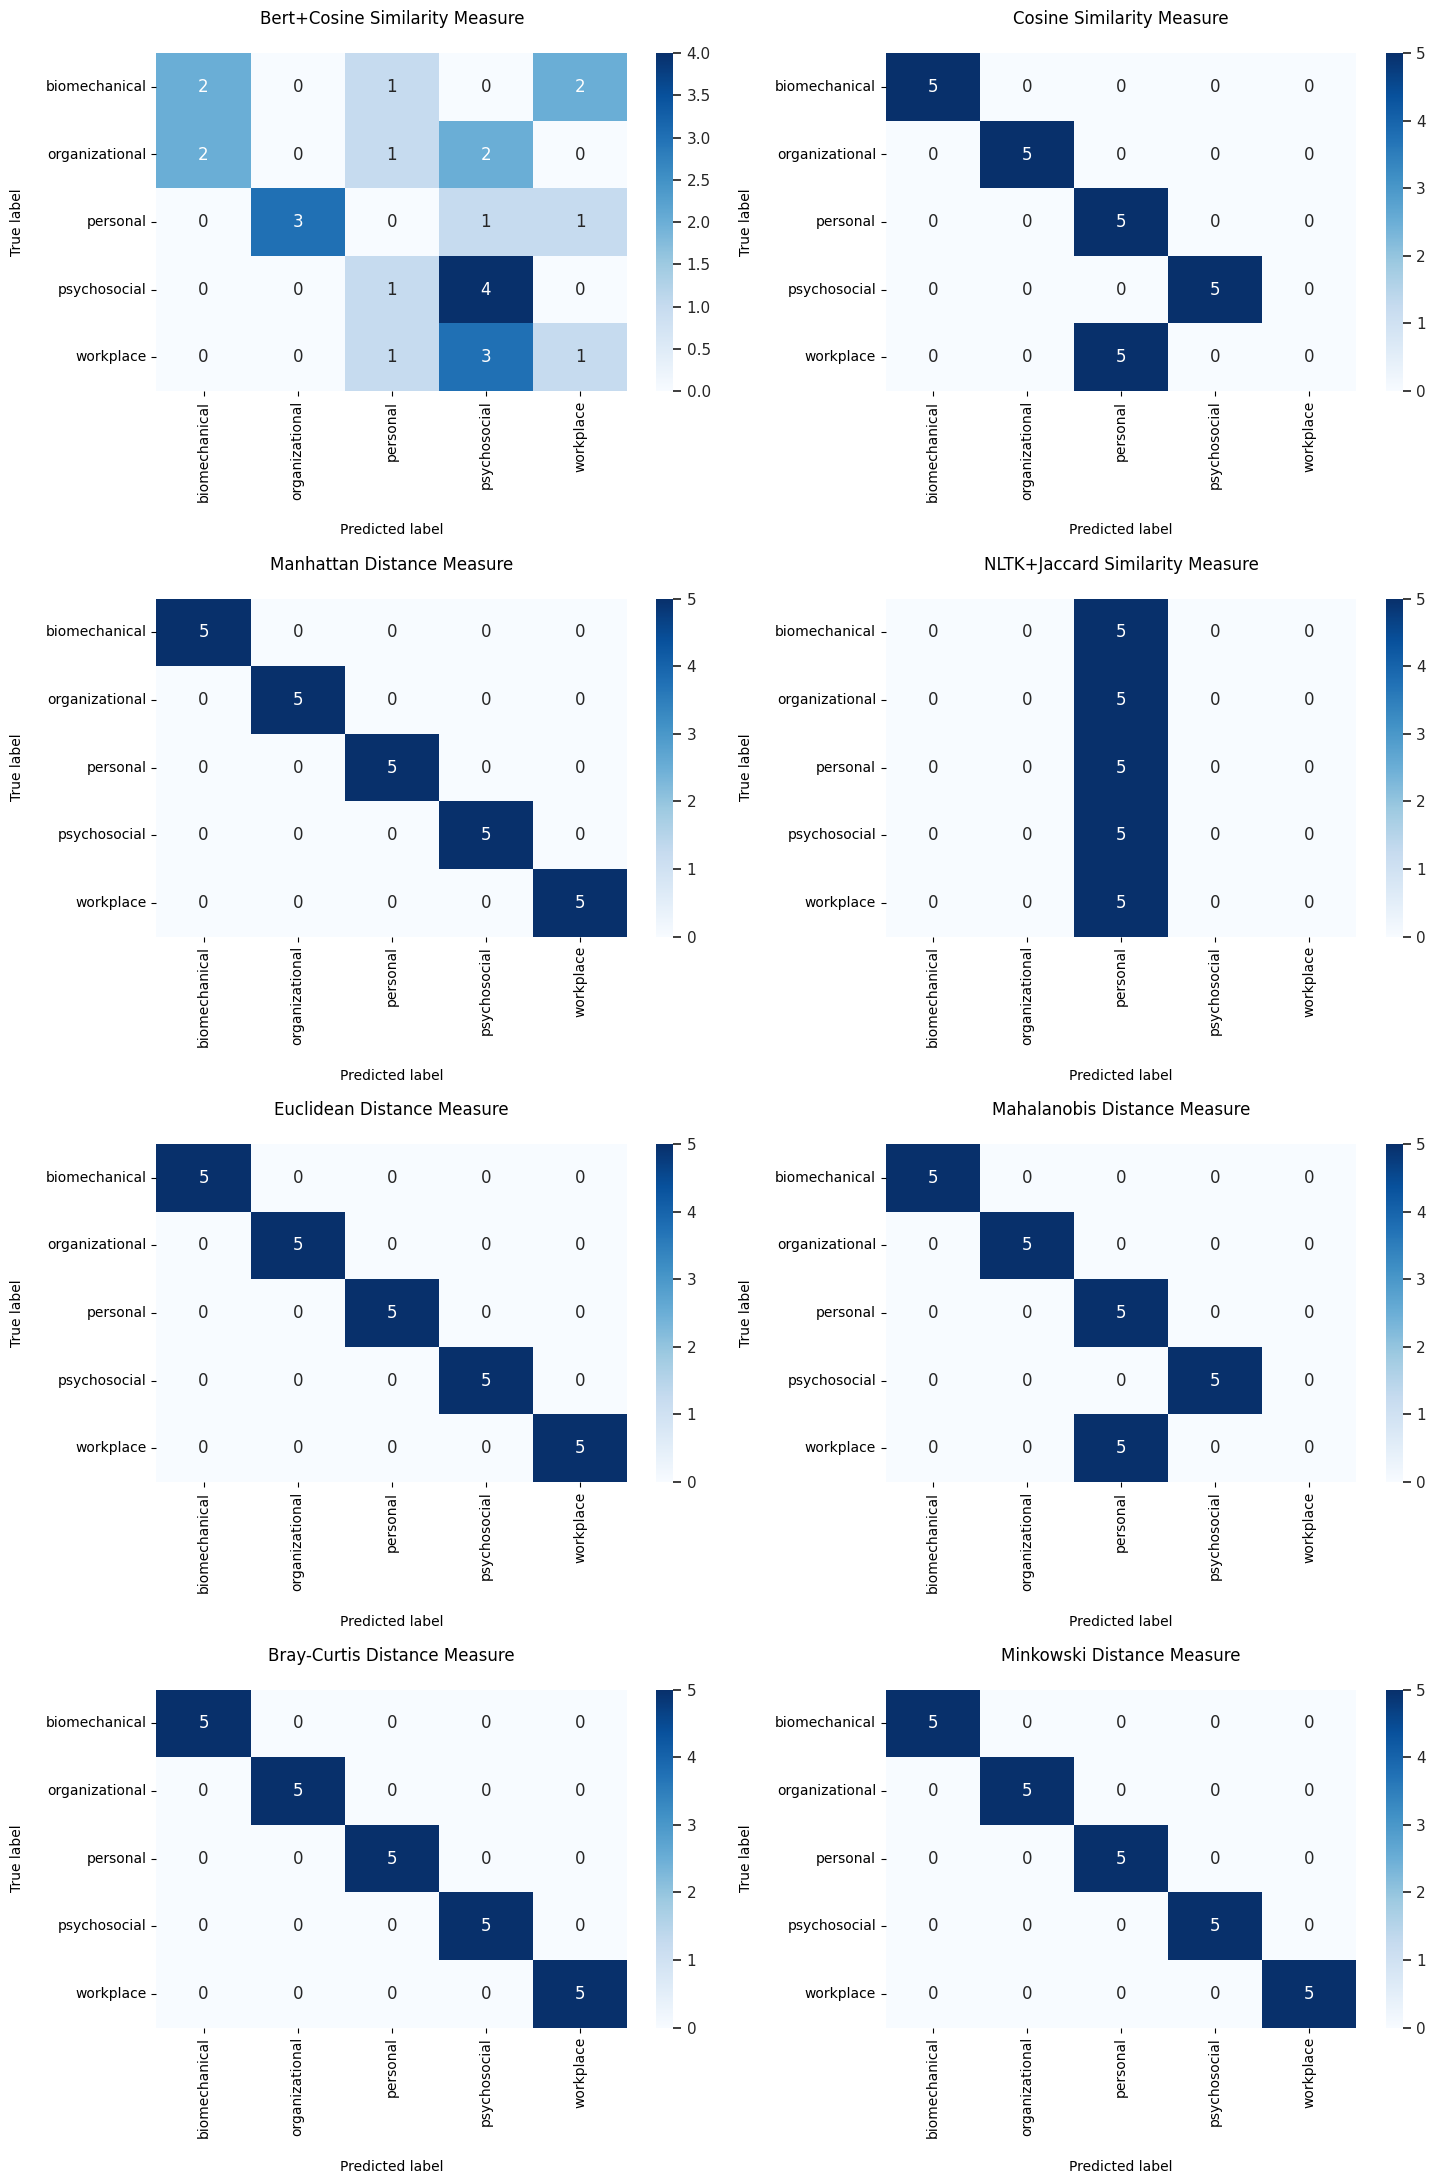

In [ ]:
# Generate confusion matrices for each distance measure
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

l = ['bertcosine','cosine','manhattan','jaccard','euclidean', 'mahalanobis', 'braycurtis', 'minkowski']
l_names = ['Bert+Cosine Similarity','Cosine Similarity','Manhattan Distance','NLTK+Jaccard Similarity','Euclidean Distance', 'Mahalanobis Distance', 'Bray-Curtis Distance', 'Minkowski Distance']
n_rows = len(l) // 2 + len(l) % 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 22))
axes = axes.ravel()

for i, name in enumerate(l_names):
    cm = confusion_matrix(df['label'], df['predicted_label_{0}'.format(l[i])], labels=np.unique(df['label']))
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cmap='Blues', cbar=True, xticklabels=np.unique(df['label']), yticklabels=np.unique(df['label']), ax=axes[i])
    axes[i].set_xlabel('\nPredicted label')
    axes[i].set_ylabel('True label\n')
    axes[i].set_title('{0} Measure\n'.format(name))

plt.tight_layout()
# Save the figure to a file
plt.savefig('confusion_matrices.png')
plt.show()

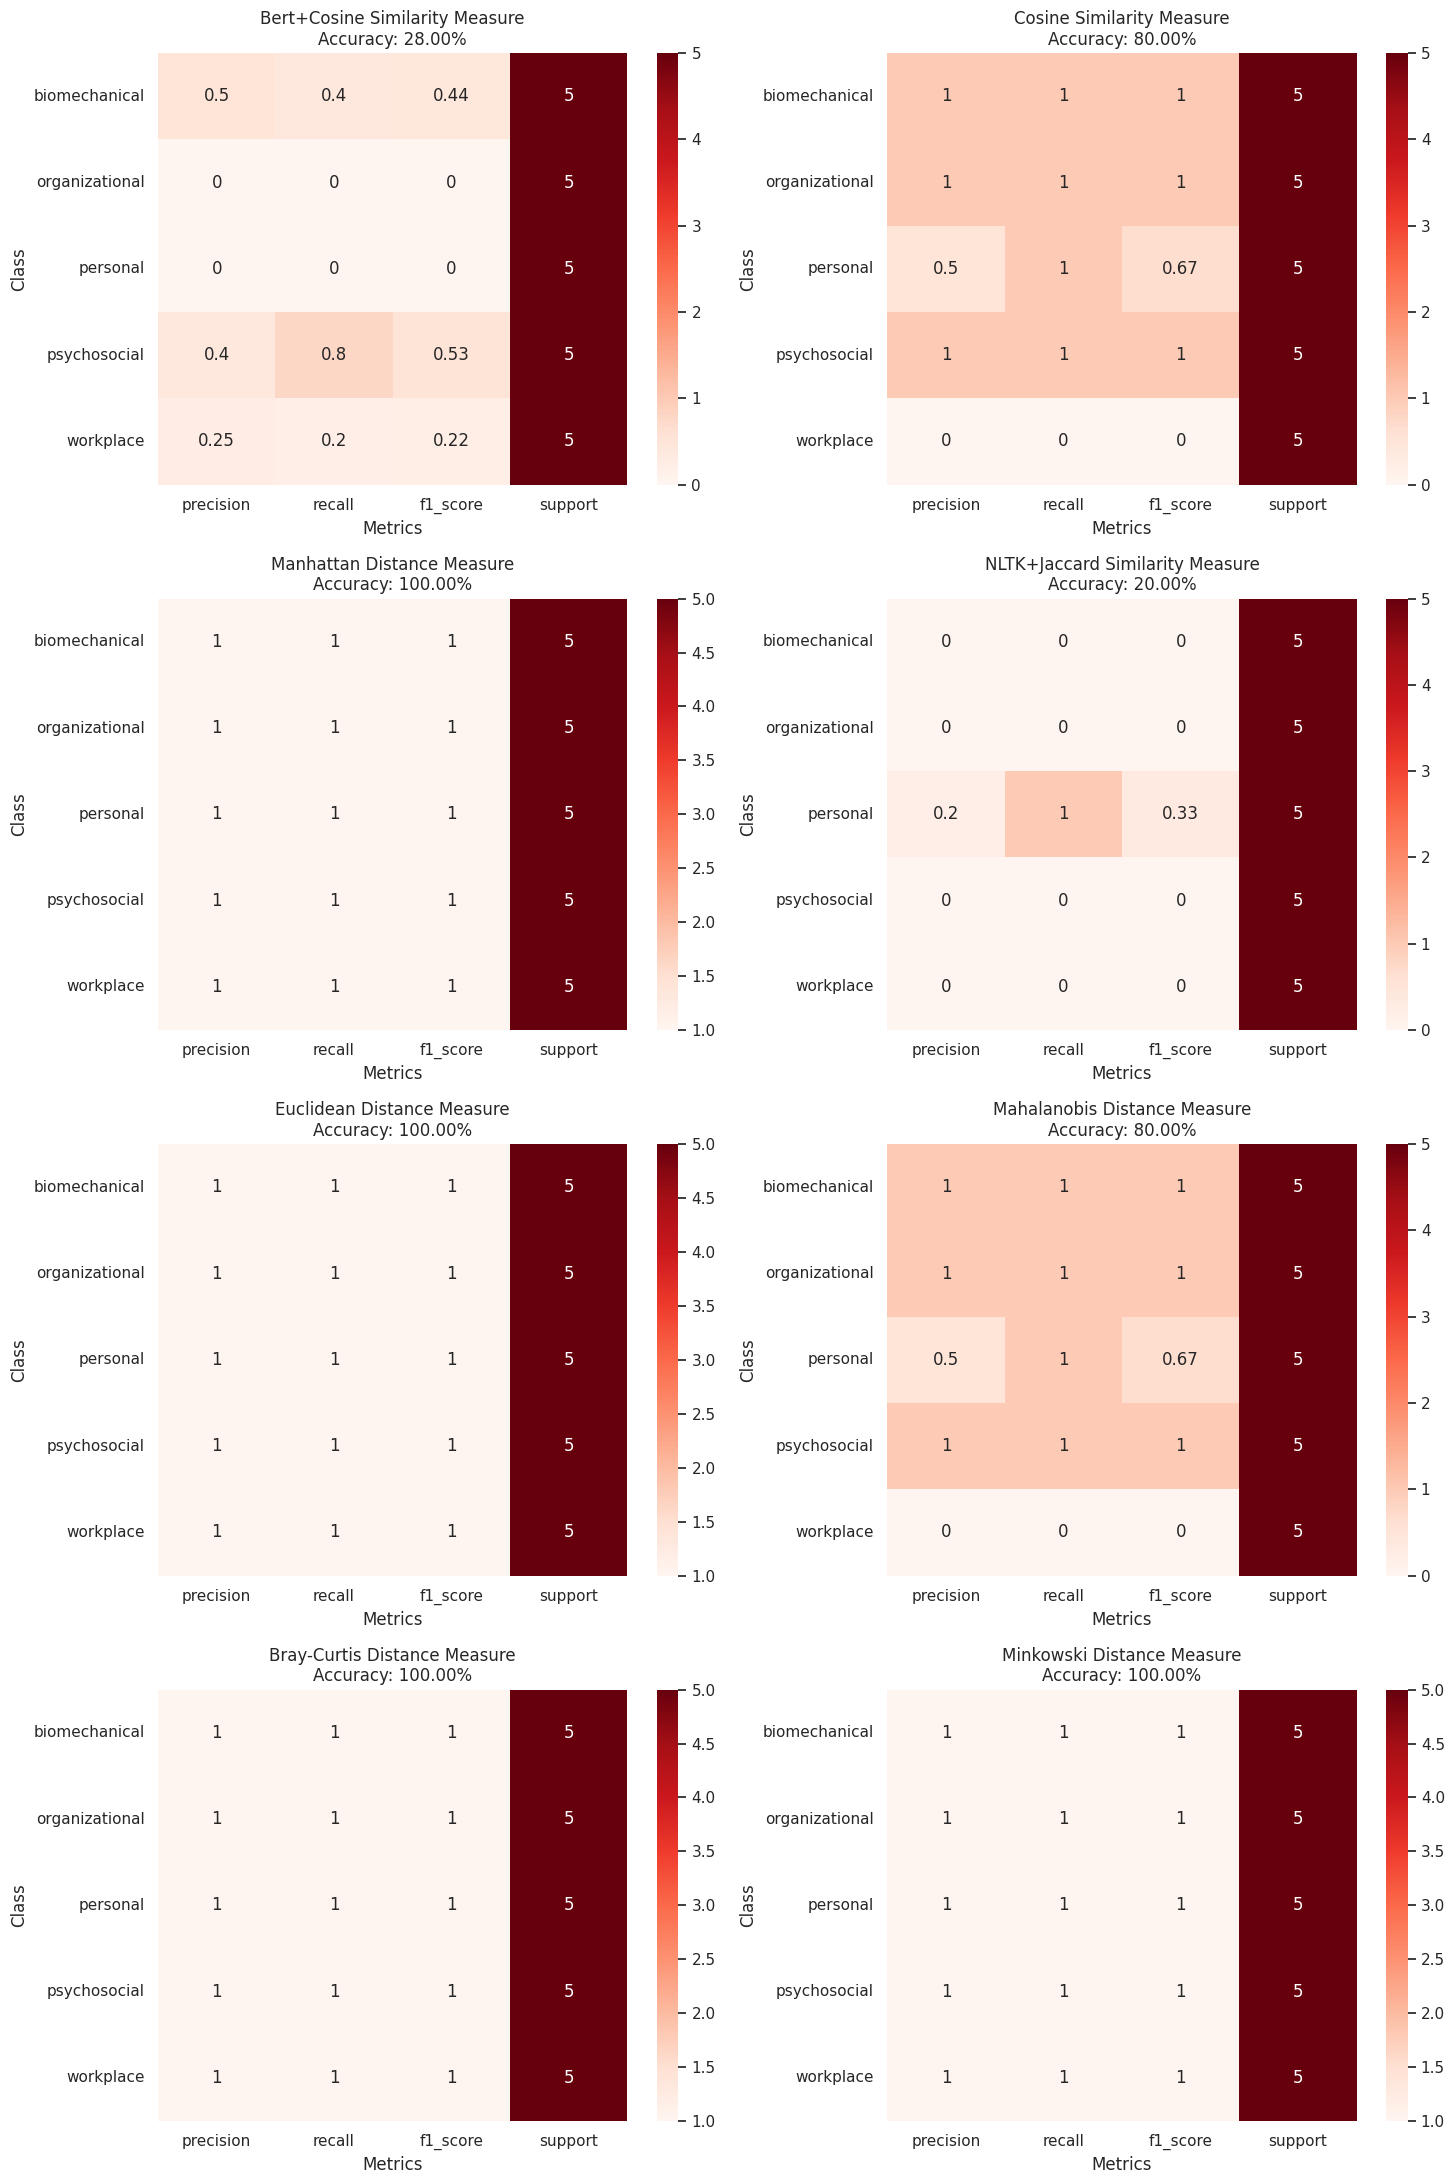

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report, ax):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = int(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', ax=ax)
    heatmap.set_xlabel('Metrics')
    heatmap.set_ylabel('Class')
    heatmap.set_title('Classification Report')
def accuracy_score(report, ax):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[6:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])

l = ['bertcosine','cosine','manhattan','jaccard','euclidean', 'mahalanobis', 'braycurtis', 'minkowski']
l_names = ['Bert+Cosine Similarity','Cosine Similarity','Manhattan Distance','NLTK+Jaccard Similarity','Euclidean Distance', 'Mahalanobis Distance', 'Bray-Curtis Distance', 'Minkowski Distance']
n_rows = len(l) // 2 + len(l) % 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 22))
axes = axes.ravel()

for i, name in enumerate(l_names):
    plot_classification_report(classification_report(df['label'], df['predicted_label_{0}'.format(l[i])]), ax=axes[i])
    accuracy = accuracy_score(classification_report(df['label'], df['predicted_label_{0}'.format(l[i])]), ax=axes[i])
    axes[i].set_title('{} Measure\nAccuracy: {:.2f}%'.format(name, accuracy*100))

plt.tight_layout()
# Save the figure to a file
plt.savefig('classification_reports.png')
plt.show()


## Statistical test

In [ ]:
from scipy.stats import ttest_rel
import numpy as np

# Define the accuracies for each model
bert_cosine = [0.26, 0.29, 0.3, 0.28, 0.25, 0.24, 0.29, 0.3, 0.27, 0.29]
nltk_jaccard = [0.22, 0.2, 0.22, 0.19, 0.2, 0.18, 0.21, 0.2, 0.18, 0.19]
st_cosine = [0.77, 0.77, 0.82, 0.8, 0.77, 0.78, 0.81, 0.81, 0.78, 0.79]
st_euclidean = [1, 0.98, 0.98, 0.98, 0.98, 0.98, 1, 0.99, 0.97, 0.98]
st_manhattan = [0.38, 0.43, 0.39, 0.44, 0.42, 0.38, 0.42, 0.41, 0.42, 0.38]
st_mahalanobis = [0.83, 0.78, 0.83, 0.84, 0.83, 0.78, 0.8, 0.82, 0.79, 0.83]
st_minkowski = [0.98, 1, 0.97, 0.98, 0.99, 0.96, 0.97, 0.96, 0.99, 0.99]
st_bray_curtis = [0.97, 0.96, 0.99, 0.99, 0.99, 0.99, 0.96, 1, 0.96, 0.99]

# Perform paired t-tests and calculate Cohen's d
models = [
    ("BERT+Cosine Similarity", bert_cosine),
    ("NLTK+Jaccard Similarity", nltk_jaccard),
    ("Sentence Transformer+Cosine Similarity", st_cosine),
    ("Sentence Transformer+Euclidean Distance", st_euclidean),
    ("Sentence Transformer+Manhattan Distance", st_manhattan),
    ("Sentence Transformer+Mahalanobis Distance", st_mahalanobis),
    ("Sentence Transformer+Minkowski Distance", st_minkowski),
    ("Sentence Transformer+Bray Curtis Distance", st_bray_curtis)
]

import pandas as pd

# Create a list to store the analysis results
analysis_results = []

# Perform paired t-tests and calculate Cohen's d
for i in range(len(models)):
    for j in range(i+1, len(models)):
        model1_name, model1_data = models[i]
        model2_name, model2_data = models[j]
        t_stat, p_val = ttest_rel(model1_data, model2_data)

        # Calculate Cohen's d
        mean_diff = np.mean(model1_data) - np.mean(model2_data)
        pooled_std = np.sqrt((np.std(model1_data, ddof=1)**2 + np.std(model2_data, ddof=1)**2) / 2)
        cohens_d = mean_diff / pooled_std

        # Append the results to the list
        analysis_results.append({
            "Model 1": model1_name,
            "Model 2": model2_name,
            "t-statistic": t_stat,
            "p-value": p_val,
            "Cohen's d": cohens_d
        })

# Convert the list to a DataFrame
df_results = pd.DataFrame(analysis_results)

# Save the DataFrame to an Excel file
excel_file = "analysis_results.xlsx"
df_results.to_excel(excel_file, index=False)

In [ ]:
df_results

,Model 1,Model 2,t-statistic,p-value,Cohen's d
0,BERT+Cosine Similarity,NLTK+Jaccard Similarity,11.758942,9.151111e-07,4.308289
1,BERT+Cosine Similarity,Sentence Transformer+Cosine Similarity,-103.524343,3.715328e-15,-25.632206
2,BERT+Cosine Similarity,Sentence Transformer+Euclidean Distance,-101.000000,4.638864e-15,-43.070984
3,BERT+Cosine Similarity,Sentence Transformer+Manhattan Distance,-14.955817,1.157375e-07,-5.940541
4,BERT+Cosine Similarity,Sentence Transformer+Mahalanobis Distance,-60.603780,4.571146e-13,-24.214012
5,BERT+Cosine Similarity,Sentence Transformer+Minkowski Distance,-87.750000,1.642749e-14,-39.448994
6,BERT+Cosine Similarity,Sentence Transformer+Bray Curtis Distance,-84.631255,2.274378e-14,-37.848248
7,NLTK+Jaccard Similarity,Sentence Transformer+Cosine Similarity,-92.298693,1.042881e-14,-35.145105
8,NLTK+Jaccard Similarity,Sentence Transformer+Euclidean Distance,-229.824467,2.844473e-18,-63.741839
9,NLTK+Jaccard Similarity,Sentence Transformer+Manhattan Distance,-22.694661,2.970137e-09,-10.945684


## Hypothesis and decisions based on the above dataframe df_results

In [ ]:
# Decision function based on p-value and Cohen's d
def make_decision(p_value, cohens_d):
    if p_value < 0.05 and abs(cohens_d) > 0.5:
        return "Reject null hypothesis and consider practical significance"
    elif p_value < 0.05:
        return "Reject null hypothesis"
    elif abs(cohens_d) > 0.5:
        return "Consider practical significance"
    else:
        return "No significant difference or practical significance"

# Make decisions for each comparison
for i, row in df_results.iterrows():
    decision = make_decision(row['p-value'], row["Cohen's d"])
    print(f"Decision for comparing {row['Model 1']} and {row['Model 2']}: {decision}")


Decision for comparing BERT+Cosine Similarity and NLTK+Jaccard Similarity: Reject null hypothesis and consider practical significance
Decision for comparing BERT+Cosine Similarity and Sentence Transformer+Cosine Similarity: Reject null hypothesis and consider practical significance
Decision for comparing BERT+Cosine Similarity and Sentence Transformer+Euclidean Distance: Reject null hypothesis and consider practical significance
Decision for comparing BERT+Cosine Similarity and Sentence Transformer+Manhattan Distance: Reject null hypothesis and consider practical significance
Decision for comparing BERT+Cosine Similarity and Sentence Transformer+Mahalanobis Distance: Reject null hypothesis and consider practical significance
Decision for comparing BERT+Cosine Similarity and Sentence Transformer+Minkowski Distance: Reject null hypothesis and consider practical significance
Decision for comparing BERT+Cosine Similarity and Sentence Transformer+Bray Curtis Distance: Reject null hypothesis